## IST 707 Final Project Code
## Notebook Format 
### 1. Data Preprocessing
### 2. Data Visualization
### 3. Random Forest Regressor
### 4. Linear Regression Model
### 5. Random Forest Classifier 
### 6. Logistic Regression
### 7. Naive Bayes Model

#### Note - We re-did our models which is why they are not in the same order as given in the report.

## 1. Data Preprocessing

In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('winemag-data_first150k.csv')

In [4]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [6]:
wine_price_avg = df.groupby('variety', as_index=False)['price'].mean()

In [7]:
wine_price_avg.head()

,variety,price
0,Agiorgitiko,19.299145
1,Aglianico,33.169884
2,Aidani,27.000000
3,Airen,8.833333
4,Albana,33.933333


In [8]:
df.price = df.price.mask(df.price.eq(0)).fillna(
    df.variety.map(wine_price_avg.set_index('variety').price))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          150909 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [10]:
df2 = df

In [11]:
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          150909 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [13]:
df2['region_1'].nunique()

1236

In [14]:
df2['region_2'].nunique()

18

In [15]:
df2['region_2'] = df2['region_2'].fillna('Unknown')

In [16]:
df2['region_1'] = df2['region_1'].fillna('Unknown')

In [17]:
df2['province'] = df2['province'].fillna('Unknown')

In [18]:
df2['country'] = df2['country'].fillna('Unknown')

In [19]:
df2['designation'].nunique()

30621

In [20]:
df2['designation'] = df2['designation'].fillna('Unknown')

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150930 non-null object
description    150930 non-null object
designation    150930 non-null object
points         150930 non-null int64
price          150909 non-null float64
province       150930 non-null object
region_1       150930 non-null object
region_2       150930 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


## 2. Data Visualization

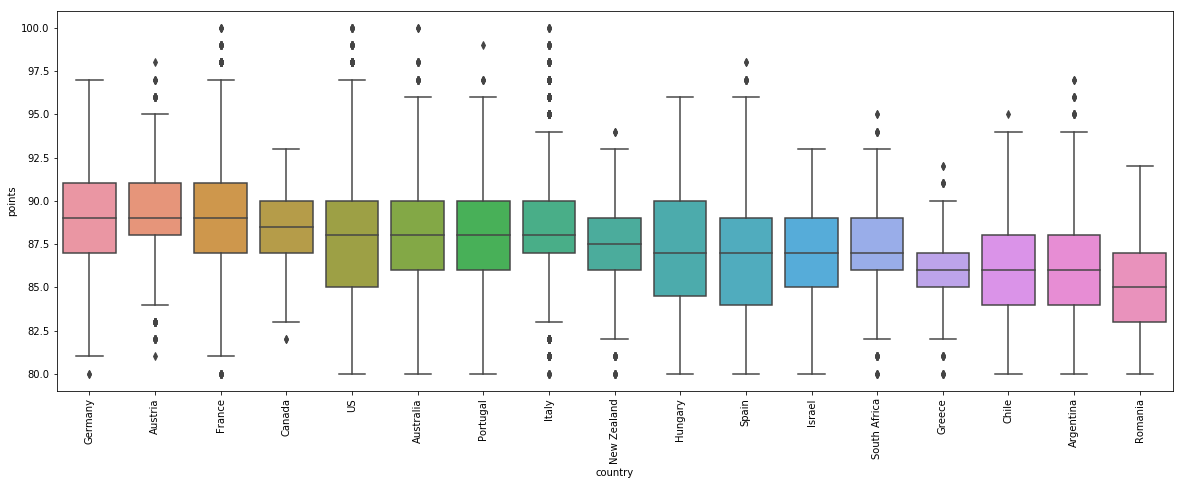

In [22]:
country=df2.groupby('country').filter(lambda x: len(x) >100)
df3 = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df3.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

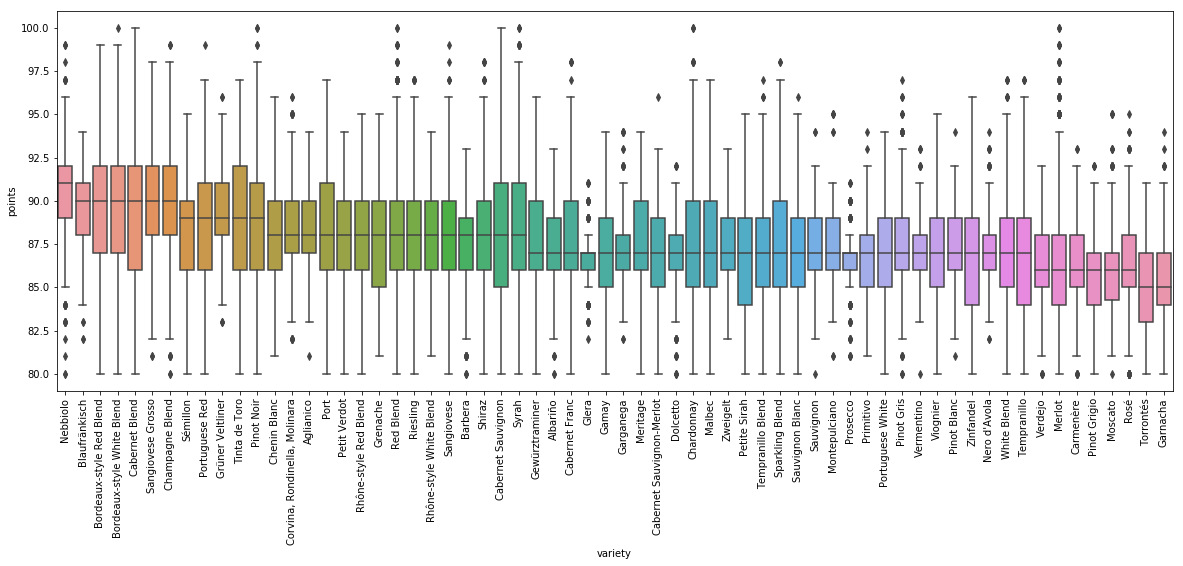

In [23]:
variety = df2.groupby('variety').filter(lambda x: len(x) >200)

df4 = pd.DataFrame({col:vals['points'] for col,vals in variety.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='points', data=variety, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

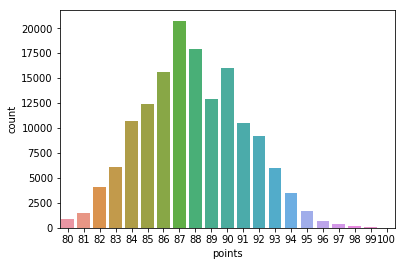

In [25]:
sns.countplot(df2['points'])

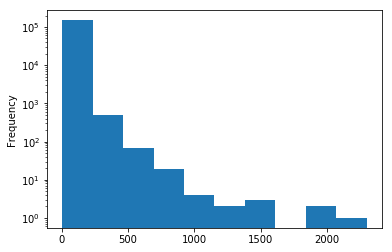

In [29]:
df2['price'].plot(kind="hist", logy =True)

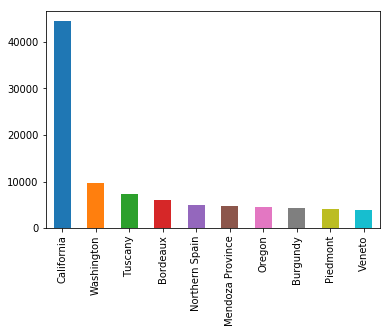

In [87]:
df2['province'].value_counts().head(10).plot.bar()

In [30]:
df2.insert(0, 'New_ID', range(880, 880 + len(df2)))

In [31]:
# work description field
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [32]:
analyser = SentimentIntensityAnalyzer()

In [33]:
score_list = []

results = []

for line in df2['description']:
    score = analyser.polarity_scores(line)
    score['description'] = line
    results.append(score)

In [34]:
df_scores = pd.DataFrame.from_records(results)

In [35]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 5 columns):
compound       150930 non-null float64
description    150930 non-null object
neg            150930 non-null float64
neu            150930 non-null float64
pos            150930 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.8+ MB


In [36]:
df_scores['label'] = 0
df_scores.loc[df_scores['compound'] > 0.2, 'label'] = 1
df_scores.loc[df_scores['compound'] < -0.2, 'label'] = -1
df_scores.head()

,compound,description,neg,neu,pos,label
0,0.9287,This tremendous 100% varietal wine hails from ...,0.0,0.768,0.232,1
1,0.7311,"Ripe aromas of fig, blackberry and cassis are ...",0.0,0.865,0.135,1
2,0.8070,Mac Watson honors the memory of a wine once ma...,0.0,0.858,0.142,1
3,0.2023,"This spent 20 months in 30% new French oak, an...",0.0,0.970,0.030,1
4,0.7717,"This is the top wine from La Bégude, named aft...",0.0,0.890,0.110,1


In [37]:
df_scores.insert(0, 'New_ID', range(880, 880 + len(df_scores)))

In [38]:
df_sent = pd.merge(df2,df_scores,on='New_ID',how='right')

In [39]:
len(df_sent)

150930

In [40]:
df_final=df_sent.drop('Unnamed: 0',axis=1)

In [41]:
df_model=df_final.drop(['description_x','description_y'],axis=1)

In [42]:
df_model.head()
df_model.to_csv('clean_wine.csv')

In [43]:
## encode cats
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

In [44]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 15 columns):
New_ID         150930 non-null int32
country        150930 non-null object
designation    150930 non-null object
points         150930 non-null int64
price          150909 non-null float64
province       150930 non-null object
region_1       150930 non-null object
region_2       150930 non-null object
variety        150930 non-null object
winery         150930 non-null object
compound       150930 non-null float64
neg            150930 non-null float64
neu            150930 non-null float64
pos            150930 non-null float64
label          150930 non-null int64
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 17.8+ MB


In [45]:
obj_varis = list(df_model)
obj_varis

['New_ID',
 'country',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'compound',
 'neg',
 'neu',
 'pos',
 'label']

In [46]:
#obj_varis.remove('points')
obj_varis.remove('price')
obj_varis.remove('compound')
obj_varis.remove('neg')
obj_varis.remove('neu')
obj_varis.remove('pos')
obj_varis.remove('label')

In [47]:
obj_varis

['New_ID',
 'country',
 'designation',
 'points',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [48]:
df_model[obj_varis] = df_model[obj_varis].apply(lambda x: d[x.name].fit_transform(x))

In [49]:
df_model=df_model.drop('New_ID',axis=1)

In [50]:
df_model.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,compound,neg,neu,pos,label
0,44,17272,16,235.0,51,738,7,70,7287,0.9287,0.0,0.768,0.232,1
1,40,4399,16,110.0,274,1070,16,553,1231,0.7311,0.0,0.865,0.135,1
2,44,25383,16,90.0,51,528,13,468,9033,0.8070,0.0,0.858,0.142,1
3,44,22308,16,65.0,282,1223,18,402,11002,0.2023,0.0,0.970,0.030,1
4,15,14261,15,66.0,313,66,16,422,5410,0.7717,0.0,0.890,0.110,1


In [51]:
cols = list(df_model.columns.values)
cols

['country',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'compound',
 'neg',
 'neu',
 'pos',
 'label']

In [75]:
df_model = df_model[['country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'compound',
 'neg',
 'neu',
 'pos',
 'label','points']]

In [76]:
df_model['points'].describe()

count    150930.000000
mean          7.888418
std           3.222392
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          20.000000
Name: points, dtype: float64

In [77]:
df_model.shape

(150930, 14)

In [78]:
X = df_model.iloc[:, 0:13].values
y = df_model.iloc[:, 13].values

## 3. Random Forest Regressor

In [79]:
import numpy as np
np.isnan(y)
np.where(np.isnan(y))
y=np.nan_to_num(y)
np.isnan(X)
np.where(np.isnan(X))
X=np.nan_to_num(X)

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.43700657178793023

In [86]:
print('Coefficients: \n', regressor.coef_)


Coefficients: 
 [ 1.84066742e-03 -3.00315075e-05  3.83242898e-02  1.14577117e-03
 -5.93506770e-05  1.68855968e-02 -6.80664165e-04 -4.85798144e-06
  6.69272361e+00  3.10444552e+00  3.81483109e+00 -6.33164431e+00
 -1.50884710e+00]


## 4. Linear Regression

In [94]:
df_model = df_model[['country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'compound',
 'neg',
 'neu',
 'pos',
 'label','points']]

X = df_model.iloc[:, 0:13].values
y = df_model.iloc[:, 13].values

import numpy as np
np.isnan(y)
np.where(np.isnan(y))
y=np.nan_to_num(y)
np.isnan(X)
np.where(np.isnan(X))
X=np.nan_to_num(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)



7.053247675950224

In [53]:
df_model['variety'].nunique()

632

## 5. Random Forest Classifier

In [60]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 14 columns):
country        150930 non-null int64
designation    150930 non-null int64
price          150909 non-null float64
province       150930 non-null int64
region_1       150930 non-null int64
region_2       150930 non-null int64
variety        150930 non-null int64
winery         150930 non-null int64
compound       150930 non-null float64
neg            150930 non-null float64
neu            150930 non-null float64
pos            150930 non-null float64
label          150930 non-null int64
points         150930 non-null int64
dtypes: float64(5), int64(9)
memory usage: 17.3 MB


In [61]:
df_class_model = df_model.drop(['compound','neg','neu','pos'],axis=1)

In [62]:
df_class_model = df_class_model[['country',
 'designation',
 'points',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'price','label']]

In [63]:
X = df_class_model.iloc[:, 0:9].values
y = df_class_model.iloc[:, 9].values

# this just ensures the arrays can be passed to sklearn

import numpy as np
np.isnan(y)
np.where(np.isnan(y))
y=np.nan_to_num(y)

np.isnan(X)
np.where(np.isnan(X))
X=np.nan_to_num(X)

In [64]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [65]:
cm

array([[  947,   150,   680],
       [  154,  2684,  2422],
       [  256,   872, 29568]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test, y_pred)*100,"%")

Accuracy Score: 87.98399279145576 %


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         -1       0.70      0.53      0.60      1777
          0       0.72      0.51      0.60      5260
          1       0.91      0.96      0.93     30696

avg / total       0.87      0.88      0.87     37733



## Feature Importance of Best Model - Random Forest Classifier:

Feature ranking:
1. feature 7 (0.221026)
2. feature 1 (0.166103)
3. feature 8 (0.164673)
4. feature 2 (0.132232)
5. feature 6 (0.114789)
6. feature 4 (0.099039)
7. feature 3 (0.051051)
8. feature 0 (0.026691)
9. feature 5 (0.024396)


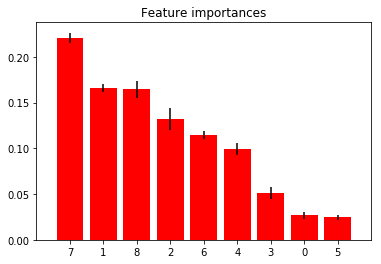

In [68]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Logistic Regression

In [100]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,class_weight='balanced',solver='liblinear',multi_class='auto')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 70,  25,  35,   8,   8,   4,   8,   7,   2,   5,   1,   0,   2,
          0,   4,   2,   0,   0,   0,   0,   1],
       [ 95,  53,  56,   8,  34,   7,  15,  14,  11,   4,   4,   2,   6,
          0,   1,   0,   0,   0,   0,   0,   2],
       [204,  92, 200,  53,  96,  13,  34,  35,  12,   6,   8,   1,  26,
          0,  23,   3,   2,   0,   0,   1,   3],
       [220, 169, 178,  90, 195,  29,  97,  73,  36,  20,  11,   3,  18,
          0,  15,   6,   6,  10,   0,   6,   4],
       [296, 211, 232, 191, 402,  80, 165, 162,  97,  38,  49,  13,  64,
          1,  58,  10,  13,   8,   5,   6,  25],
       [254, 192, 202, 197, 495, 132, 263, 273, 155,  88,  48,  18,  59,
          4,  64,  20,  16,  15,   3,  17,  29],
       [240, 199, 173, 185, 538, 161, 337, 389, 253, 111,  75,  37,  82,
          7,  99,  53,  31,  31,  12,  13,  44],
       [251, 186, 192, 206, 705, 121, 393, 532, 447, 209, 130,  76, 109,
         15, 174,  92,  57,  78,  20,  37, 101],
       [151, 139, 151, 1

In [109]:
print(classifier.coef_[2])

[ 5.11672547e-03  6.00293331e-06 -5.79395647e-02 -2.41590019e-03
  8.91619542e-06 -5.34035977e-02 -6.19820822e-05 -1.25766870e-05
 -7.01854616e-01  6.32782417e-02  1.86474824e-03 -1.13302492e-01
 -8.79760535e-01]


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.19      0.37      0.25      1777
           0       0.25      0.01      0.02      5260
           1       0.85      0.94      0.89     30696

   micro avg       0.78      0.78      0.78     37733
   macro avg       0.43      0.44      0.38     37733
weighted avg       0.73      0.78      0.74     37733



In [63]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test, y_pred)*100,"%")

Accuracy Score: 78.08284525481673 %


## 7. Naive Bayes

In [83]:
## naive bayes
X = df_class_model.iloc[:, 0:9].values
y = df_class_model.iloc[:, 9].values

# this just ensures the arrays can be passed to sklearn

import numpy as np
np.isnan(y)
np.where(np.isnan(y))
y=np.nan_to_num(y)

np.isnan(X)
np.where(np.isnan(X))
X=np.nan_to_num(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Fitting Multiple Linear Regression to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.32210296163784535

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[    0,    21,  1376],
       [    0,    11,  4185],
       [    1,     9, 24583]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8147485589346054